# Problem Set 1:Demonstrating Homography estimation and Bayer Demosaicking



# Starting

Run the following code to import the modules you'll need.

In [ ]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
import IPython

In [ ]:
%%capture
! wget -O img1.jpg "https://drive.google.com/uc?export=download&id=1dDdk7IrM5oO2gA57_bapqdIgk7CmJV03"
! wget -O img2.jpg "https://drive.google.com/uc?export=download&id=1V_lui-asfT3Xly4O_Kuez8IDYEZkct4i"
! wget -O orion.jpg "https://drive.google.com/uc?export=download&id=1L1deUWfJbdtss4liHii8Luhnl2RG_ITl"
! wget -O point_tracker.html "https://drive.google.com/uc?export=download&id=1I9Xw8u0EdAEsP4GGuNwh267zL5lwxQw_"


# Problem. Calculating NFL's pitch homography


# Visualize Input Images

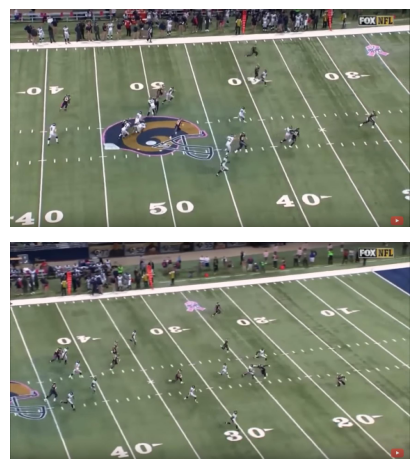

In [ ]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1 = cv2.resize(img1,(575, 313))
img2 = cv2.resize(img2,(575, 313))


def plot_imgs(img1, img2, title=""):
  fig, ax = plt.subplots(2, 1)
  for a in ax:
    a.set_axis_off()
  ax[0].imshow(img1)
  ax[1].imshow(img2)
  ax[0].set_title(title)
  plt.tight_layout()

plot_imgs(img1, img2)

# Record point correspondences

To obtain the homography between two images you need to record multiple point correspondences. You can gather as many correspondences as you want as long as there are more than the minimum you calculated.

We have provided you with a point tracker tool that shows you the x and y coordinates of your cursor on top of any of the images. It also records your last clicks, so it should pretty easy for you to alternate clicking between the two images. You will use the points recorded to build your A and y vector later.

In [ ]:
IPython.display.HTML('./point_tracker.html')

#Use the correspondences to build A and y

Use the recorded point correspondences to build your A matrix and y vector based on the structure that you obtained.




In [ ]:
# ===============================================
# TODO



A = np.array([[516, 94, 1, 0, 0, 0, -259*516, -259*94],
              [0, 0, 0, 516, 94, 1, -125*516, -125*94],
              [376, 102, 1, 0, 0, 0, -129*376, -129*102],
              [0, 0, 0, 376, 102, 1, -139*376, -139*102],
              [286, 215, 1, 0, 0, 0, -46*286, -46*215],
              [0, 0, 0, 286, 215, 1, -254*286, -254*215],
              [286, 162, 1, 0, 0, 0, -43*286, -43*162],
              [0, 0, 0, 286, 162, 1, -202*286, -202*162]])

y = np.array([[259],
              [125],
              [129],
              [139],
              [46],
              [254],
              [43],
              [202]])


# ===============================================


# Use A and y to find your homgraphy

Now that you have your A matrix and y vector you can find your homography by applying the least squares formula to solve for x. Then build your 3x3 homography matrix H from the values of the vector x.

In [ ]:
# ===============================================
# TODO

# x = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
x = np.dot(np.linalg.pinv(A), y)
H = np.array([[x[0,0], x[1,0], x[2,0]],
             [x[3,0], x[4,0], x[5,0]],
             [x[6,0], x[7,0], 1]])

# ===============================================

It is time to check if you got the right homography!

Run the code below. The image on the left has the yellow line at the 33rd yard. If your homography is correct the yellow line in the second image should also be at the 33rd yard.

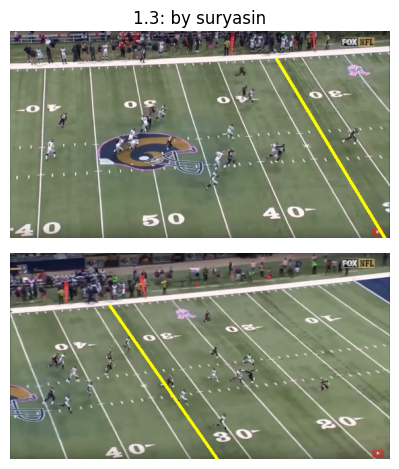

In [ ]:

line_1 = ((int(1210/3), int(126/3)), (int(1701/3), int(939/3)))

# First point of second line
pt1 = H@np.array([line_1[0][0],line_1[0][1], 1])
pt1 /= pt1[2]
pt1 = pt1.astype(int)

#Second point of second line
pt2 = H@np.array([line_1[1][0],line_1[1][1], 1])
pt2 /= pt2[2]
pt2 = pt2.astype(int)

line_2 = ((pt1[0], pt1[1]), (pt2[0], pt2[1]))


img1 = cv2.line(img1, (line_1[0][0],line_1[0][1]), (line_1[1][0], line_1[1][1]), (255, 255, 0) , 4)
img2 = cv2.line(img2, (line_2[0][0],line_2[0][1]), (line_2[1][0],line_2[1][1]), (255, 255, 0) , 4)

plot_imgs(img1, img2, title=f"1.3: by {uniqname}")

# Problem. Bayer Demosaicking

In this problem you will implement the function demosaic to recover an image from its grayscaled mosaicked version. Below is the implementation of the mosaicking function bayer_filter.


# Visualize original image

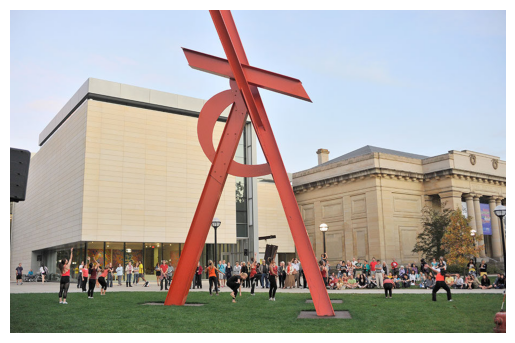

In [ ]:
orion_img = cv2.imread('orion.jpg')
orion_img = cv2.cvtColor(orion_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.axis('off')
plt.imshow(orion_img)

#Visualize image after bayer filter is applied (Colored and greyscale)

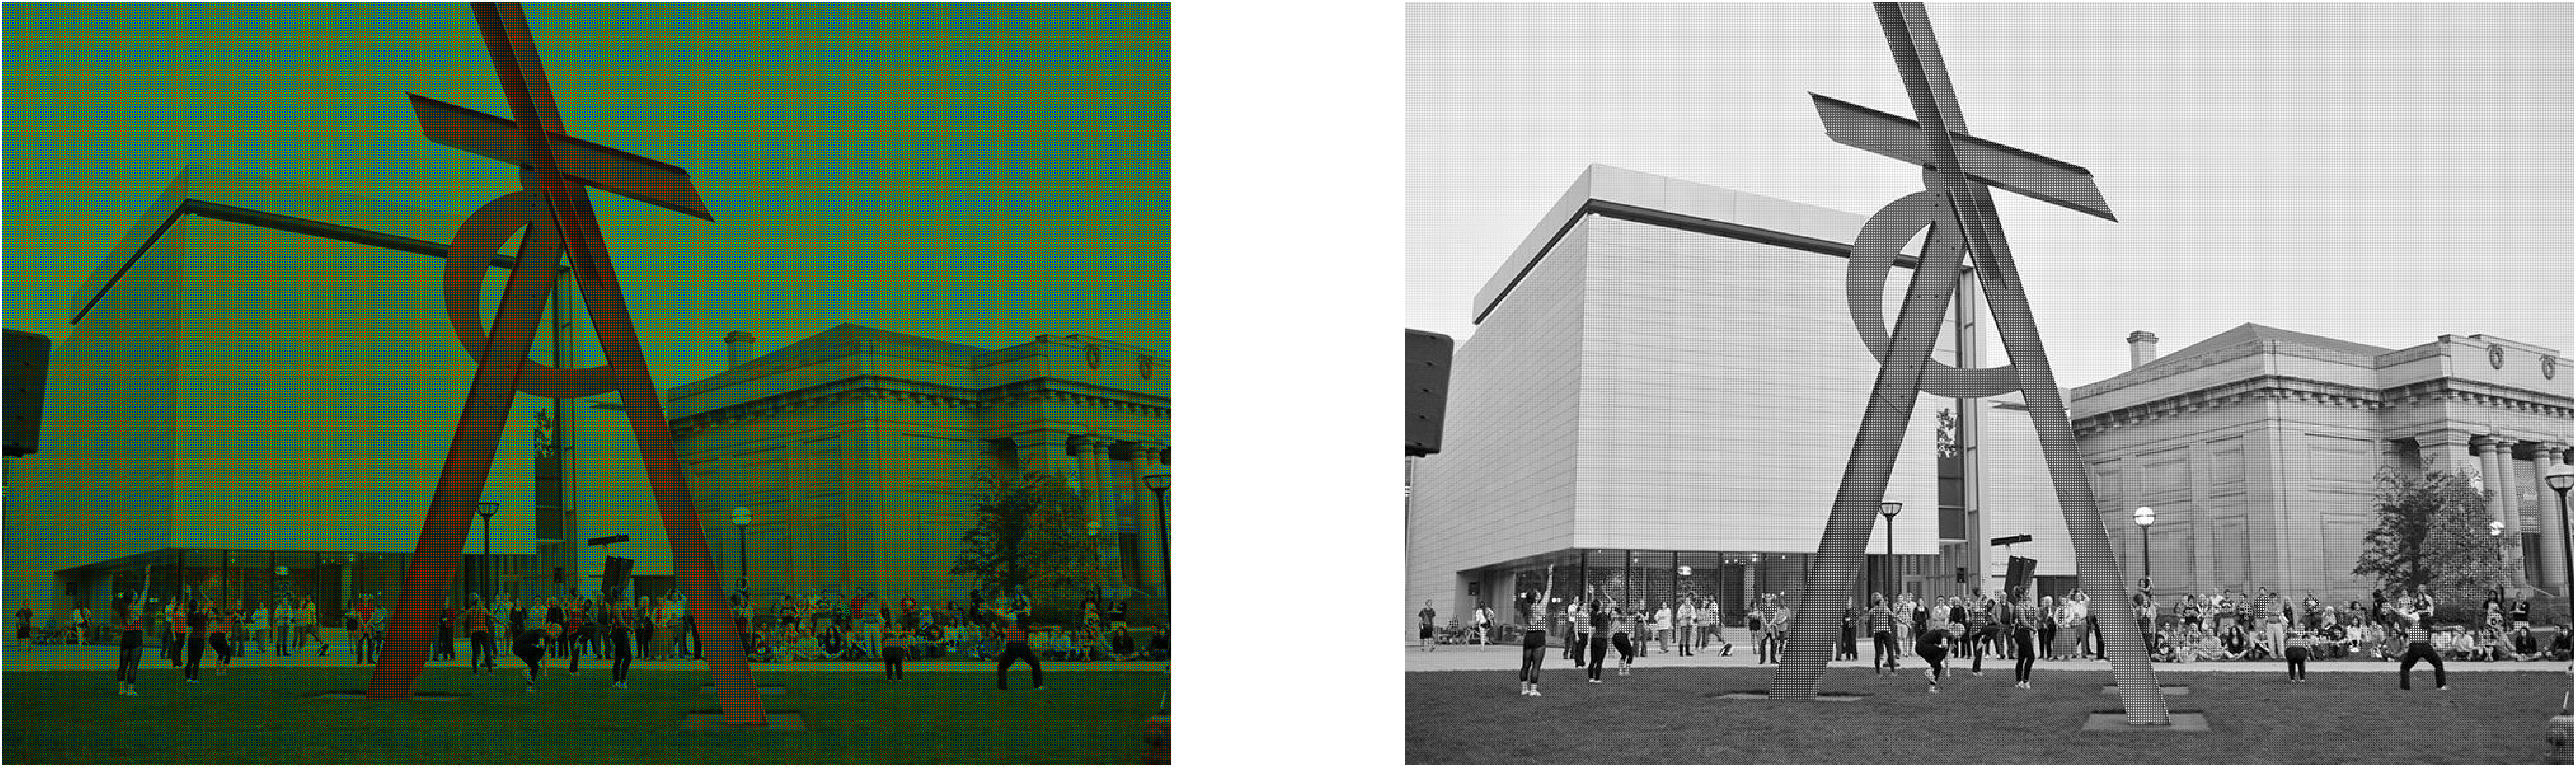

In [ ]:
def bayer_filter(img):
  # function bayer_filter filters an input color image I
  # by the Bayer pattern as below, and outputs a filtered color
  # image I and a gray scaled image I_gray in which the
  # value of every pixel is the intensity of corresponding
  # color.
  # b | g
  # -----
  # g | r


  rows, cols, _ = img.shape

  colored = img.copy()

  mask = np.zeros((2,2,3))
  mask[0,0,:] = [0,0,1] #blue
  mask[0,1,:] = [0,1,0] #green
  mask[1,0,:] = [0,1,0] #green
  mask[1,1,:] = [1,0,0] #red

  for row in range(rows):
    mask_row = row%2

    for col in range(cols):
      mask_col = col%2
      colored[row, col, :] = colored[row, col, :] * mask[mask_row, mask_col, :]

  gray = colored[:, :, 0] + colored[:, :, 1] + colored[:, :, 2]

  return colored, gray



filtered_img, gray_img = bayer_filter(orion_img)

fig, ax = plt.subplots(1, 2, figsize=(150, 200))
for a in ax:
  a.set_axis_off()
ax[0].imshow(filtered_img)
ax[1].imshow(gray_img, cmap="gray")




# Demosaicking

Now you are going to build your demosaicking function. The helper functions in the block below are meant to compute the average of the sorrounding pixels in all possible scenarios.

In [ ]:
# ===============================================

def four_neighbors_average(gray_img, row, col):
  # Computes the average of the four neighborgh pixels (left, right, top and bottom).
  # REMEMBER that for the pixels on the border, we only consider the neighboring pixels within the image domain.

  # TODO (Optional)
  surr_pixels = []

  A,B = gray_img.shape

  if row-1>=0:
    surr_pixels.append(gray_img[row-1,col])
  if row+1<A:
    surr_pixels.append(gray_img[row+1,col])

  if col-1>=0:
    surr_pixels.append(gray_img[row,col-1])
  if col+1<B:
    surr_pixels.append(gray_img[row,col+1])


  avg = sum(surr_pixels)/len(surr_pixels)
  return avg

def four_corners_average(gray_img, row, col):
  # Computes the average of the four corner pixels (top-left, top-right, bottom-left, bottom-right).
  # REMEMBER that for the pixels on the border, we only consider the neighboring pixels within the image domain.

  # TODO (Optional)
  surr_pixels = []

  A,B = gray_img.shape

  if row-1>=0 and col-1>=0:
    surr_pixels.append(gray_img[row-1, col-1])
  if row-1>=0 and col+1<B:
    surr_pixels.append(gray_img[row-1, col+1])

  if row+1<A and col-1>=0:
    surr_pixels.append(gray_img[row+1, col-1])
  if row+1<A and col+1<B:
    surr_pixels.append(gray_img[row+1, col+1])

  avg = sum(surr_pixels)/len(surr_pixels)
  return avg

def left_right_average(gray_img, row, col):
  # Computes the average of the left and right pixels.
  # REMEMBER that for the pixels on the border, we only consider the neighboring pixels within the image domain.

  # TODO (Optional)
  surr_pixels = []

  A,B = gray_img.shape

  if col+1<B:
    surr_pixels.append(gray_img[row,col+1])
  if col-1>=0:
    surr_pixels.append(gray_img[row,col-1])


  avg = sum(surr_pixels)/len(surr_pixels)
  return avg

def top_bottom_average(gray_img, row, col):
  # Computes the average of the top and bottom pixels.
  # REMEMBER that for the pixels on the border, we only consider the neighboring pixels within the image domain.

  #TODO (optional)
  surr_pixels = []

  A,B = gray_img.shape

  if row+1<A:
    surr_pixels.append(gray_img[row+1,col])
  if row-1>=0:
    surr_pixels.append(gray_img[row-1,col])


  avg = sum(surr_pixels)/len(surr_pixels)
  return avg

# ===============================================

In [ ]:
# ===============================================

def demosaic(gray_img):
  # recovers the original color image (M*N*3) from the Bayer encoded image I_gray (M*N)
  #TODO
  A,B = gray_img.shape
  original_img = np.zeros((A,B,3), dtype=np.uint8)


  for x in range(A):
      for y in range(B):
          #Order of Recovery blue color, green, green, & red
          if x%2==0 and y%2==0:
            original_img[x,y,0] = four_corners_average(gray_img,x,y)
            original_img[x,y,1] = four_neighbors_average(gray_img,x,y)
            original_img[x,y,2] = gray_img[x,y]

          elif x%2==0 and y%2==1:
            original_img[x,y,0] = top_bottom_average(gray_img,x,y)
            original_img[x,y,1] = gray_img[x,y]
            original_img[x,y,2] = left_right_average(gray_img,x,y)

          elif x%2==1 and y%2==0:
            original_img[x,y,0] = left_right_average(gray_img,x,y)
            original_img[x,y,1] = gray_img[x,y]
            original_img[x,y,2] = top_bottom_average(gray_img,x,y)

          else:
              original_img[x,y,0] = gray_img[x,y]
              original_img[x,y,1] = four_neighbors_average(gray_img,x,y)
              original_img[x,y,2] = four_corners_average(gray_img,x,y)

  return original_img
# ===============================================


# Visualize reconstructed image

Time to see if your algorithm works. Run the code below to check if the reconstructed image matches the original one.

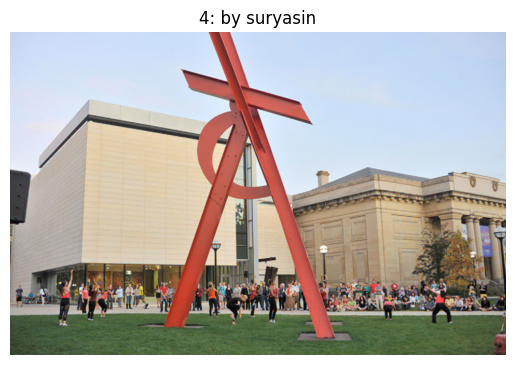

In [ ]:
recon_img = demosaic(gray_img)
plt.figure()
plt.axis('off')
# plt.title(f"4: by {uniqname}")
plt.imshow(recon_img/255.)